In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import experiments

metrics = ['train', 'train_rand_labels', 'test']
curves = 6
curve_labels = ['Glorot Norm', 'Glorot Unif', 'He Norm', 'He Unif', 'Lecun Norm', 'Lecun Unif']
curve_label_colors = ['blue', 'lightblue', 'green', 'lightgreen', 'darkorange', 'moccasin']
sizes = 5
size_factors = [0.25, 0.5, 1, 2, 4]
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
seeds = 5

results = np.zeros((curves, seeds, sizes))
results_test = np.zeros((curves, seeds, sizes))
results_rand = np.zeros((curves, seeds, sizes))
# results  indexed[itype][seed][size_factor]

# read data and fill in results dict
for ID in range(2, 62):

    print('Processing ID:', ID)
    opt = experiments.opt[ID]

    itype = opt.init_type
    size = size_idx_map[opt.dnn.neuron_multiplier[0]]
    flag_random = opt.dataset.random_labels

    for seed in range(0, 1):
        csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name[:-1] +str(seed) + '_redundancy.csv'
        df = pd.read_csv(csv_file)
        train_acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
        test_acc = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
        if flag_random:
            results_rand[itype, seed, size] = train_acc
        else:
            results[itype, seed, size] = train_acc
            results_test[itype, seed, size] = test_acc

results *= 100
results_test *= 100
results_rand *= 100

Processing ID: 2
Processing ID: 3
Processing ID: 4
Processing ID: 5
Processing ID: 6
Processing ID: 7
Processing ID: 8
Processing ID: 9
Processing ID: 10
Processing ID: 11
Processing ID: 12
Processing ID: 13
Processing ID: 14
Processing ID: 15
Processing ID: 16
Processing ID: 17
Processing ID: 18
Processing ID: 19
Processing ID: 20
Processing ID: 21
Processing ID: 22
Processing ID: 23
Processing ID: 24
Processing ID: 25
Processing ID: 26
Processing ID: 27
Processing ID: 28
Processing ID: 29
Processing ID: 30
Processing ID: 31
Processing ID: 32
Processing ID: 33
Processing ID: 34
Processing ID: 35
Processing ID: 36
Processing ID: 37
Processing ID: 38
Processing ID: 39
Processing ID: 40
Processing ID: 41
Processing ID: 42
Processing ID: 43
Processing ID: 44
Processing ID: 45
Processing ID: 46
Processing ID: 47
Processing ID: 48
Processing ID: 49
Processing ID: 50
Processing ID: 51
Processing ID: 52
Processing ID: 53
Processing ID: 54
Processing ID: 55
Processing ID: 56
Processing ID: 57


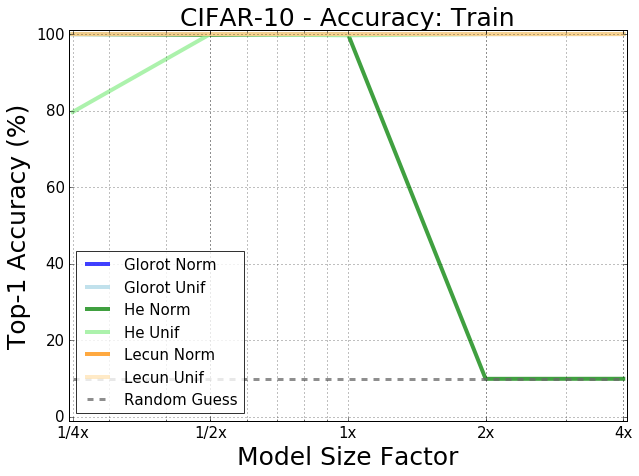

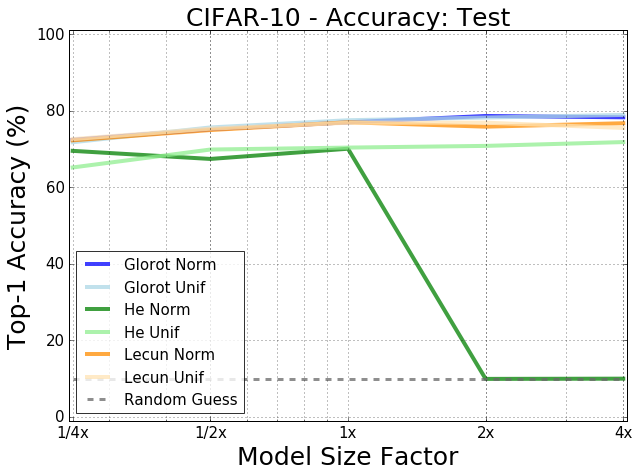

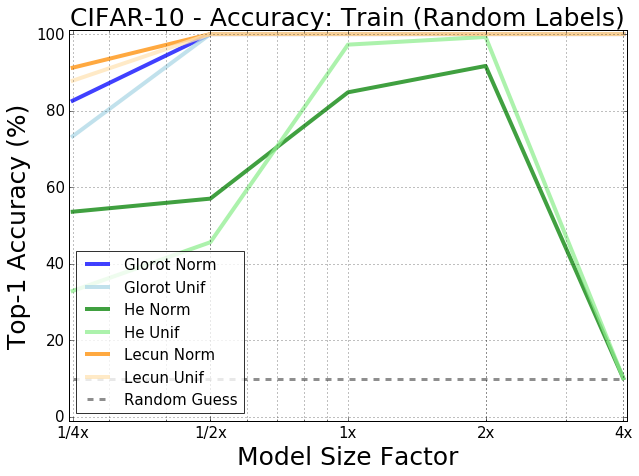

In [5]:
# first plot training accuracy for correctly labeled data

% matplotlib inline
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Accuracy: Train', fontsize=25)
plt.xlabel('Model Size Factor', fontsize=25)
plt.ylabel('Top-1 Accuracy (%)', fontsize=25)
plt.xlim((0.245, 4.07))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=15)

for curve_idx in range(curves):
    plt.plot(size_factors, results[curve_idx, 0], color=curve_label_colors[curve_idx], linewidth=4, alpha=0.75)
plt.plot(size_factors, [10 for i in range(len(size_factors))], color='dimgrey', linestyle='--', linewidth=3, alpha=0.75)
plt.legend(curve_labels + ['Random Guess'], loc='lower left', framealpha=0.8, fontsize=15)

plt.show()

# second plot the training/testing accuracy for the models that fit random data

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Accuracy: Test', fontsize=25)
plt.xlabel('Model Size Factor', fontsize=25)
plt.ylabel('Top-1 Accuracy (%)', fontsize=25)
plt.xlim((0.245, 4.07))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=15)

for curve_idx in range(curves):
    plt.plot(size_factors, results_test[curve_idx, 0], color=curve_label_colors[curve_idx], linewidth=4, alpha=0.75)
plt.plot(size_factors, [10 for i in range(len(size_factors))], color='dimgrey', linestyle='--', linewidth=3, alpha=0.75)
plt.legend(curve_labels + ['Random Guess'], loc='lower left', framealpha=0.8, fontsize=15)

plt.show()

# third plot testing accuracy for correctly labeled data (unless they're all 1)

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Accuracy: Train (Random Labels)', fontsize=25)
plt.xlabel('Model Size Factor', fontsize=25)
plt.ylabel('Top-1 Accuracy (%)', fontsize=25)
plt.xlim((0.245, 4.07))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=15)

for curve_idx in range(curves):
    plt.plot(size_factors, results_rand[curve_idx, 0], color=curve_label_colors[curve_idx], linewidth=4, alpha=0.75)
plt.plot(size_factors, [10 for i in range(len(size_factors))], color='dimgrey', linestyle='--', linewidth=3, alpha=0.75)
plt.legend(curve_labels + ['Random Guess'], loc='lower left', framealpha=0.8, fontsize=15)

plt.show()
